<a href="https://colab.research.google.com/github/jundanha/verifies-user-on-registration-and-exams/blob/main/Test_Gesture_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import cv2
import json

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Simple CNN to predict the direction a person is looking at,
The Code is not that clean and user friendly but i hope if you are reading this it can be helpful somehow
Any Feedback would be appreciated,
Obviously 3 epochs and only 500 images to train is not that much but i did that to save time and the CNN still performs pretty good
Keep in mind that when only give one input to vis_directie the function will display the real vector of the direction where the person is looking at and when given two inputs it will give the predicted direction.
To speed up time you can delete the code where it is calling the function image_processing to df1.li as the code only uses df1.segmentatio to train and test the model


In [ ]:
index=[str(str(0)*(5-len(str(i))))+str(i) for i in range(4000)]

In [ ]:
df1=pd.DataFrame()

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/archive.zip'  # Update with your actual file path

# Specify the directory where you want to extract the file
extracted_path = '/content/Dataset Gesture Tracking'  # Update with your desired extraction path

# Unzip the file
import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List the contents of the extracted folder
import os
os.listdir(extracted_path)

['output']

In [ ]:
df1["segmentatio"]=["Dataset Gesture Tracking/output/segmentation/" + i + ".png" for i in index]

In [ ]:
df1["annotatio"]=["Dataset Gesture Tracking/output/annotation/" + i + ".json" for i in index]

In [ ]:
df1["li"]=["Dataset Gesture Tracking/output/lit/" + i + ".png" for i in index]

In [ ]:
import cv2

def image_processing(image):
    img = cv2.imread(image)
    if img is None:
        return -1
    else:
        img = cv2.resize(img,(250,250))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img / 255.0
        img = np.float32(img)
        return img

In [ ]:
df1.li=pd.Series(df1.li)

In [ ]:
df1.segmentatio = df1.segmentatio.apply(lambda x: image_processing(x))

In [ ]:
df1.li=df1.li.apply(lambda x: image_processing(x))

In [ ]:
from matplotlib import pyplot as plt
def visualize(image):
    plt.imshow(image)
    plt.title('my picture')
    plt.show()

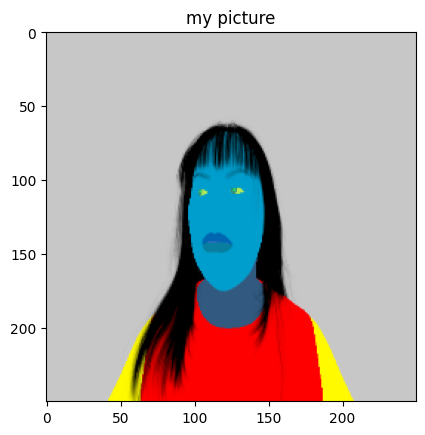

In [ ]:
visualize(df1.segmentatio[3])

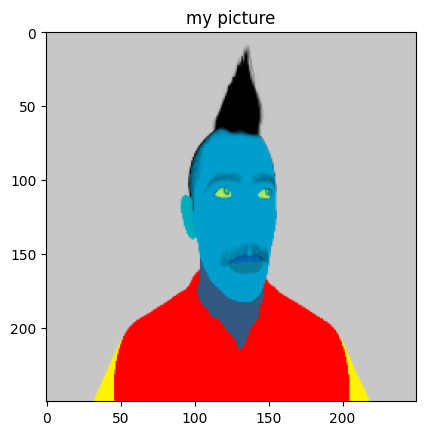

In [ ]:
visualize(df1.segmentatio[1301])

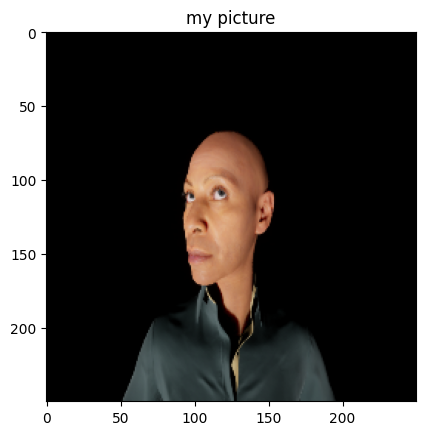

In [ ]:
visualize(df1.li[0])

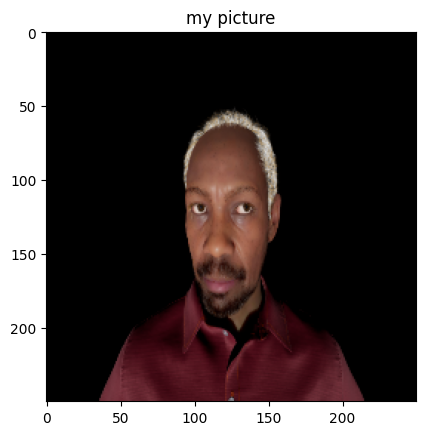

In [ ]:
visualize(df1.li[1])

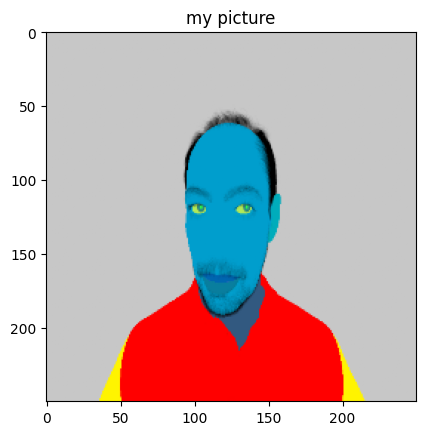

In [ ]:
visualize(df1.segmentatio[1])

In [ ]:
def vis_directie(index, vec=[0,0]):
    data=json.load(open(df1.annotatio[index]))
    direction = np.array(data["Overall"]["ImageEyesGazeDirection"])
    if(vec!=[0,0]):
         head_direction=np.array(vec)
    else:
        head_direction=np.array(data["Overall"]["ImageHeadDirection"])

    left_eye =  np.array(data["Landmarks"]["L_Eye"])
    right_eye =  np.array(data["Landmarks"]["R_Eye"])
    nose= np.array(data["Landmarks"]["NoseLower"])
    arrow_width = 20
    offset = 100
    fig,ax=plt.subplots()
    ar=cv2.resize(df1.segmentatio[index],(640,480))
    ax.imshow(ar)
    ax.add_patch(plt.Arrow(*left_eye, *(direction*offset), width=arrow_width))
    ax.add_patch(plt.Arrow(*right_eye, *(direction*offset), width=arrow_width, color="r"))
    ax.add_patch(plt.Arrow(*nose, *(head_direction*offset), width=arrow_width,color="y"))

    plt.show()

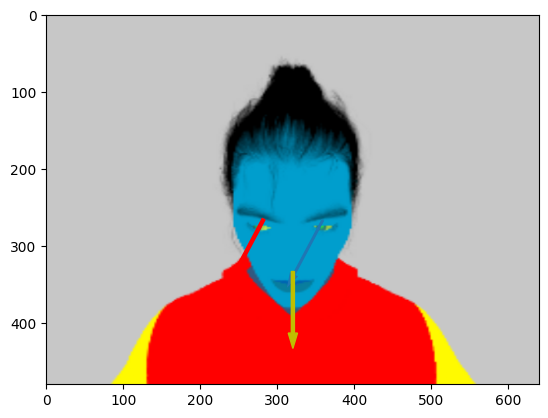

In [ ]:
vis_directie(12)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
def model():

    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',input_shape=(250,250,3)))
    model.add(MaxPooling2D((3,3)))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D((3,3)))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(2,activation='linear'))

    model.compile(loss='mean_squared_error',metrics=['accuracy'], optimizer='adam')
    return model


In [ ]:
def getHeadDir(index):
    data=json.load(open(df1.annotatio[index]))
    head_direction=np.array(data["Overall"]["ImageHeadDirection"])
    return head_direction

In [ ]:
arrHeadDir=[getHeadDir(i) for i in range(500)]
arrHeadDir=np.array(arrHeadDir)

In [ ]:
model = model()

In [ ]:
arr=[]
for i in range(500):
    arr.append(df1.segmentatio[i])
arr=np.array(arr)
arr.shape

(500, 250, 250, 3)

In [ ]:
arrImg=arr

In [ ]:
model.fit(arrImg,arrHeadDir, epochs=6, batch_size=32)


Epoch 1/6
16/16 [==============================] - 28s 2s/step - loss: 0.7029 - accuracy: 0.5700
Epoch 2/6
16/16 [==============================] - 28s 2s/step - loss: 0.4337 - accuracy: 0.6640
Epoch 3/6
16/16 [==============================] - 28s 2s/step - loss: 0.2498 - accuracy: 0.8300
Epoch 4/6
16/16 [==============================] - 27s 2s/step - loss: 0.1258 - accuracy: 0.9120
Epoch 5/6
16/16 [==============================] - 30s 2s/step - loss: 0.0667 - accuracy: 0.9400
Epoch 6/6
16/16 [==============================] - 26s 2s/step - loss: 0.0400 - accuracy: 0.9660


In [ ]:
arrT=[]
for i in range(500,600):
    arrT.append(df1.segmentatio[i])

arrT=np.array(arrT)
arrImgT=arrT

arrHeadDirT=[getHeadDir(i) for i in range(500,600)]
arrHeadDirT=np.array(arrHeadDirT)
loss= model.evaluate(arrImgT,arrHeadDirT, verbose=0)

# Print the loss and accuracy
print('Test loss:', loss)


Test loss: [0.05523252487182617, 0.9599999785423279]


1/1 [==============================] - 0s 40ms/step


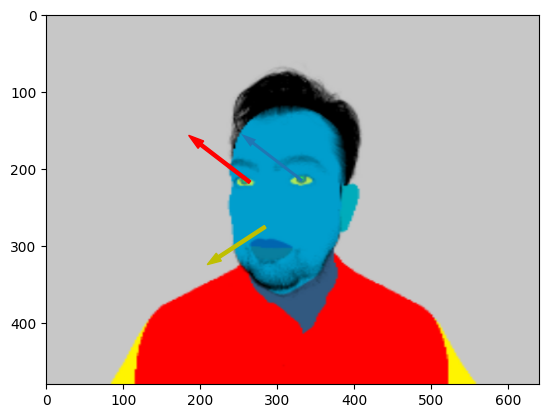

[[[0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]
  ...
  [0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]]

 [[0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]
  ...
  [0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]]

 [[0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]
  ...
  [0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]]

 ...

 [[0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]
  ...
  [0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]]

 [[0.78039217 0.78039217 0.78039217]
  [0.78039217 0.78039217 0.78039217]


In [ ]:
for index in range(1200,1201):
    xy=model.predict(df1.segmentatio[index].reshape(1,250,250,3))
    predicted_direction=xy.reshape(2).tolist()
    vis_directie(index,predicted_direction)

In [ ]:
model.save('/content/drive/MyDrive/Gesture Tracking')

In [ ]:
import dlib

In [ ]:
# Initialize dlib face detector and facial landmarks predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('path_to_shape_predictor_68_face_landmarks.dat')  # Replace with the actual path

def detect_landmarks(image_path):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = detector(img_gray)
    if not faces:
        raise ValueError("No faces detected in the image.")

    shape = predictor(img_gray, faces[0])
    landmarks = np.array([(shape.part(i).x, shape.part(i).y) for i in range(shape.num_parts)])

    return landmarks

RuntimeError: ignored

In [ ]:
def vis_directie(image_path, gaze_direction, head_direction=[0, 0]):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (640, 480))  # Adjust the size as needed

    left_eye = np.array([100, 100])  # Update with actual left eye coordinates
    right_eye = np.array([200, 100])  # Update with actual right eye coordinates
    nose = np.array([150, 150])  # Update with actual nose coordinates

    arrow_width = 20
    offset = 100
    fig, ax = plt.subplots()

    ax.imshow(img)
    ax.arrow(left_eye[0], left_eye[1], gaze_direction[0] * offset, gaze_direction[1] * offset, width=arrow_width, head_width=arrow_width, head_length=arrow_width, fc='blue', ec='blue')
    ax.arrow(right_eye[0], right_eye[1], gaze_direction[0] * offset, gaze_direction[1] * offset, width=arrow_width, head_width=arrow_width, head_length=arrow_width, fc='red', ec='red')
    ax.arrow(nose[0], nose[1], head_direction[0] * offset, head_direction[1] * offset, width=arrow_width, head_width=arrow_width, head_length=arrow_width, fc='yellow', ec='yellow')

    plt.show()

In [1]:
# Image path for "face looking left.webp"
image_path = '/content/face sample 3.jpg'

# Make the prediction
img = cv2.imread(image_path)
img = cv2.resize(img, (250, 250))
img = img.reshape(1, 250, 250, 3) / 255.0
trial = model.predict(img)
predicted_direction = trial.reshape(2).tolist()

# Assuming df1 is defined somewhere before this code
vis_directie(image_path, predicted_direction)

NameError: ignored

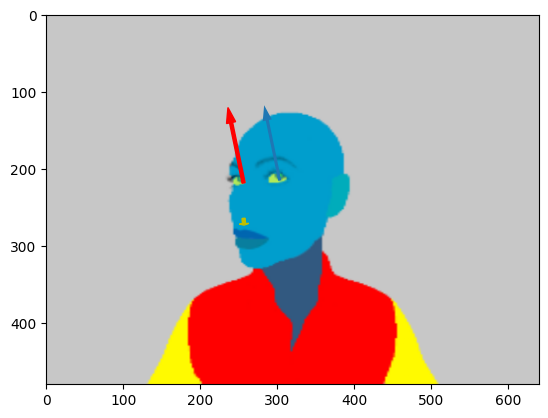

In [ ]:
for index in range(0,1):
  predicted_direction=trial.reshape(2).tolist()
  vis_directie(index,predicted_direction)

In [ ]:
# Load the image using OpenCV
image_path = '/content/face looking down.jpeg'
img = cv2.imread(image_path)

# Resize the image to the desired dimensions (250x250 in this case)
img = cv2.resize(img, (250, 250))

# Reshape the image to match the expected input shape for the model
img = img.reshape(1, 250, 250, 3)

# Normalize the pixel values if needed
img = img / 255.0  # Assuming pixel values are in the range [0, 255]

# Make the prediction
trial = model.predict(img)

1/1 [==============================] - 0s 44ms/step


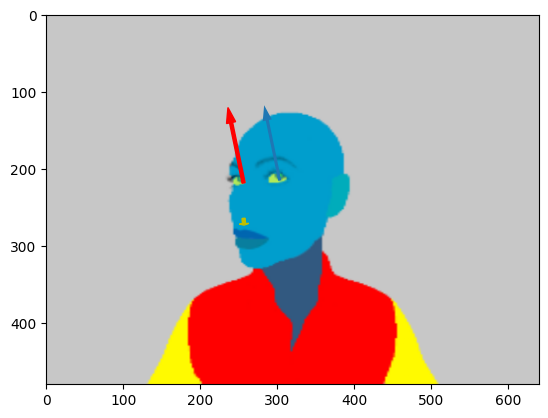

In [ ]:
for index in range(0,1):
  predicted_direction=trial.reshape(2).tolist()
  vis_directie(index,predicted_direction)